# Exercício 6 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9593907594680786, 4.827865453200858e-16)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SixthMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2         3
0  0.735513  0.983709 -0.910918  0.399210
1 -0.710789  1.000000 -0.000372  0.284728
2  0.928515  0.999991  0.503530 -0.004221
3 -0.750095  1.000000  0.310360  0.571793
4  0.045545  0.304480 -0.909322 -0.357131


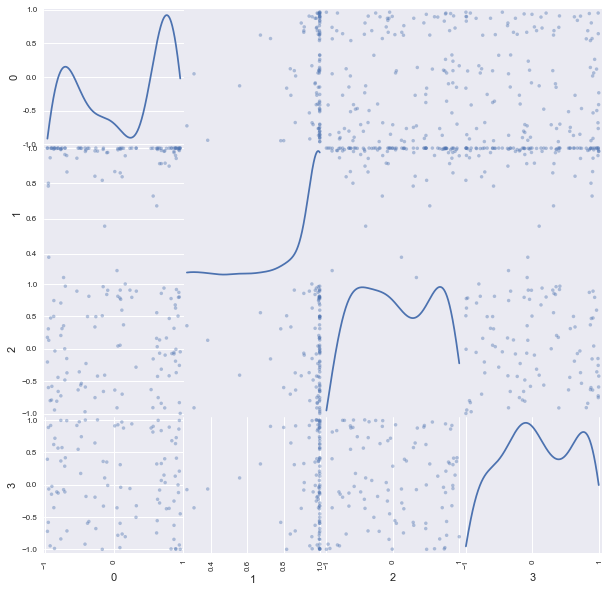

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.6787,0.8962,9.3898e-07
1,1.2468,2.3164,0.4586,1.7347e-17
2,0,0.4031,0.9355,0.00010311
3,0,0.2561,0.9325,6.9472e-05


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.015501022338867188 seconds


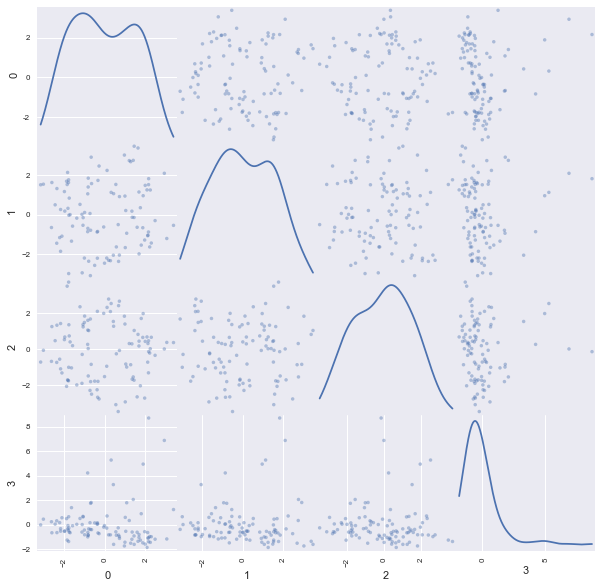

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.0244,0.3235,0.9627,0.0062908
1,0,0.1819,0.9766,0.072636
2,0,0.1074,0.9854,0.33767
3,0.6525,2.4169,0.7025,6.1763e-13


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


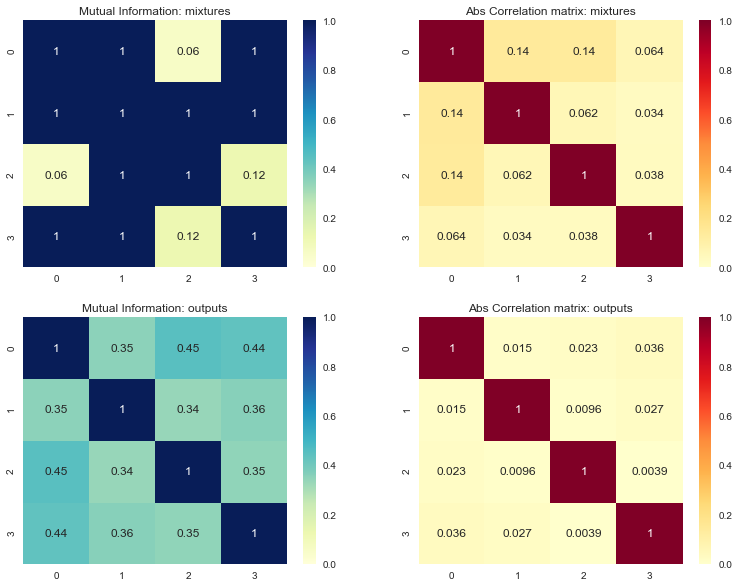

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1, decayRate = 1e-7, runs  = 1) 

Execution time: 0.019002437591552734 seconds


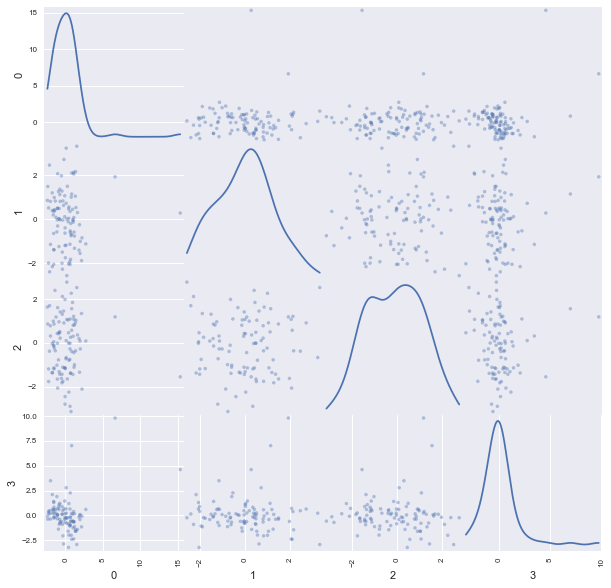

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.9176,1.5397,0.6705,1.1696e-13
1,0,0.1146,0.9836,0.24929
2,0,0.1149,0.9859,0.36869
3,0.5597,82.1332,0.791,1.3182e-10


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


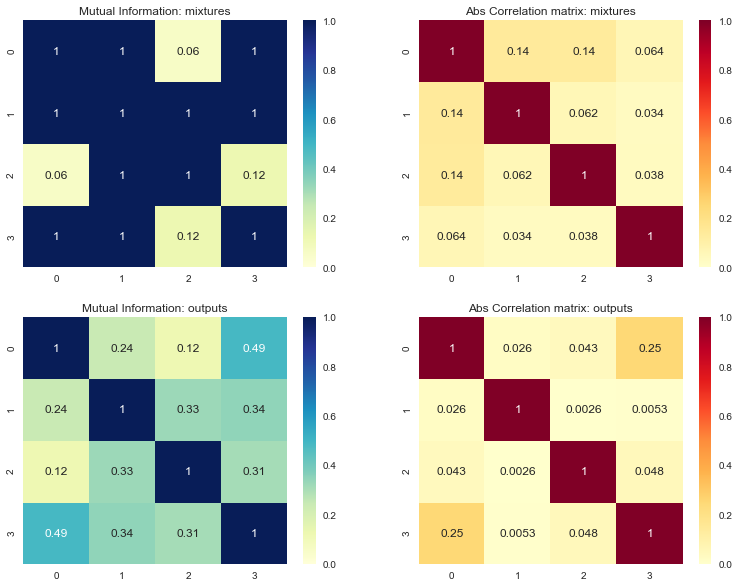

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-9, runs = 1)

Execution time: 0.013501644134521484 seconds


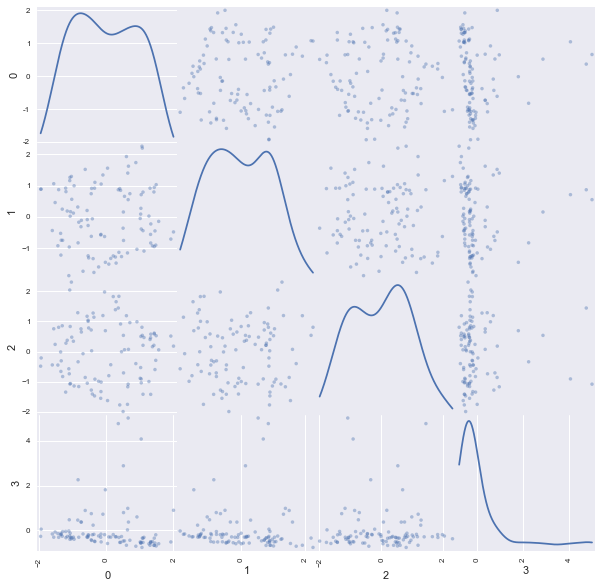

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.1638,0.9603,0.0042447
1,0,0.1766,0.9717,0.029711
2,0,0.2019,0.977,0.076876
3,0.9206,2.4607,0.559,7.647e-16


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


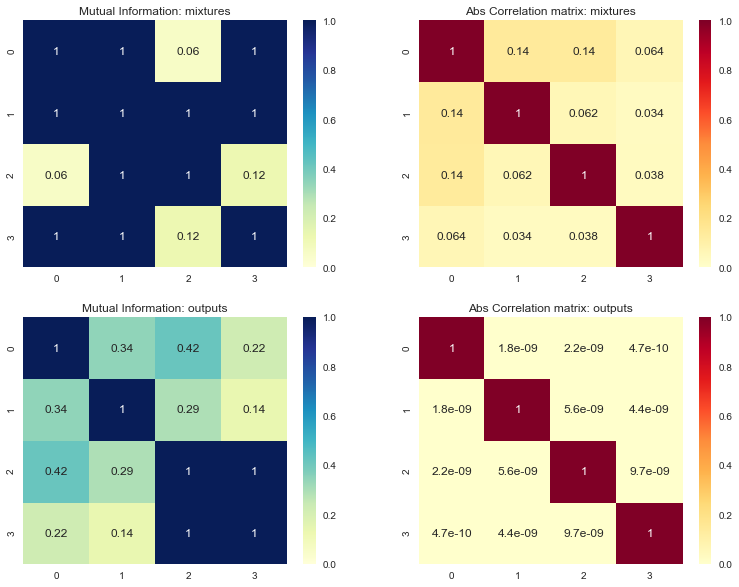

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Fontes conhecidas

In [15]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/SixthSource100Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(4, 100)


,0,1,2,3
0,0.735513,0.983709,-0.910918,0.399210
1,-0.710789,1.000000,-0.000372,0.284728
2,0.928515,0.999991,0.503530,-0.004221
3,-0.750095,1.000000,0.310360,0.571793
4,0.045545,0.304480,-0.909322,-0.357131


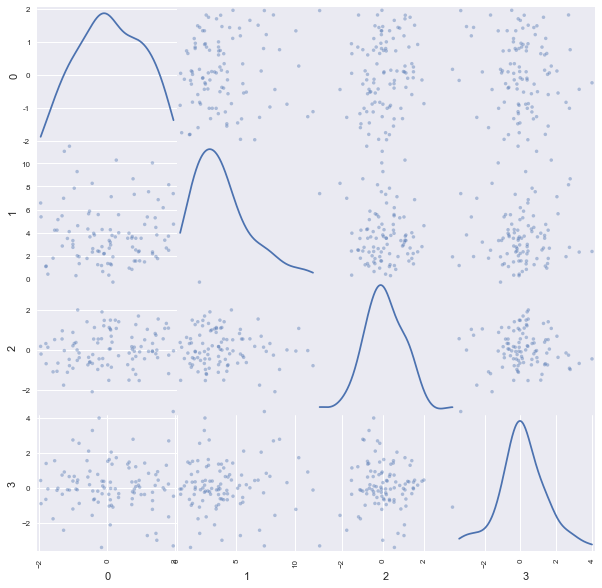

In [16]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(4, 100) (4, 100)
[[ 0.14523044  0.05086052  0.10626821  1.29831156]
 [ 0.27162706  0.27806144  0.28647903  0.40476168]
 [ 0.31115226  0.25769305  0.24665625  7.80485099]
 [ 0.26038159  0.1773035   0.17477006  8.82070138]]


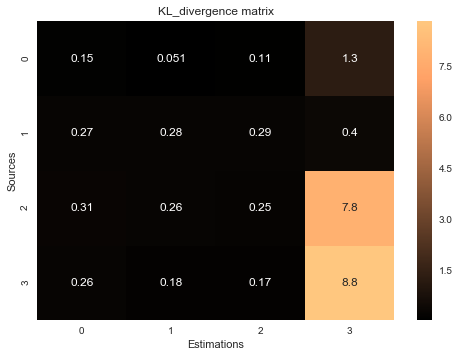

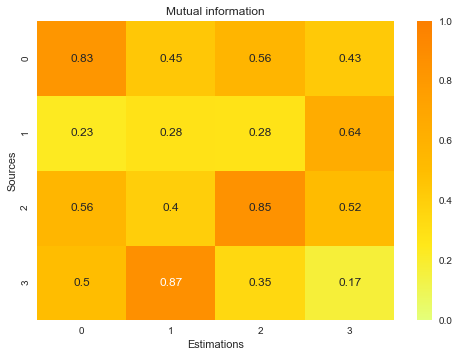

In [17]:
from evaluation import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(4, 100) (4, 100)
[[ 10.17963374   0.17101112   0.09901775   1.30627931]
 [  5.98929662   0.283116     0.44286585   1.191075  ]
 [ 17.28433411   0.23503503   0.17542117   5.99955132]
 [ 17.77643238   0.11619013   0.15538926   4.92906185]]


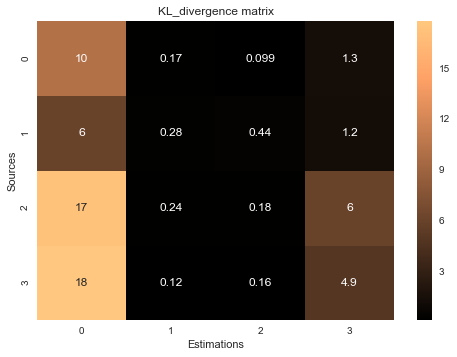

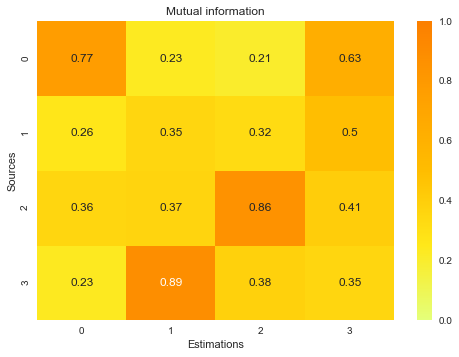

In [18]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(4, 100) (4, 100)
[[  0.02567348   0.10655989   0.11432279   5.79528711]
 [  0.2709327    0.20273483   0.22101029   4.37036721]
 [  0.2854193    0.29729152   0.32890101  10.3996525 ]
 [  0.2084847    0.22561698   0.27305108   8.78358347]]


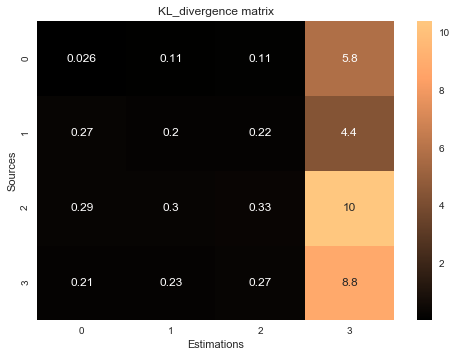

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


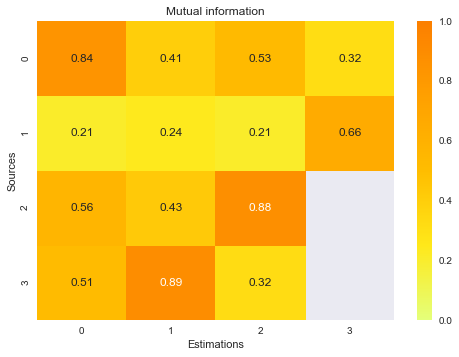

In [19]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)